In [34]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model

In [35]:
def costFunction(t0,t1,x,y):
    return 1/(2*len(x))*np.sum(np.square((t0+t1*x-y)))

In [36]:
def gradientDescent(t0,t1,x,y,alpha,maxIter=1000,tolerance=.001):
    theta = np.zeros((maxIter,2))
    J = np.zeros((maxIter,))
    m = len(x)
    for i in range(maxIter):
        t0New = t0-alpha/m*np.sum(t0+t1*x-y)
        t1New = t1-alpha/m*np.sum((t0+t1*x-y)*x)
        theta[i,0] = t0New
        theta[i,1] = t1New
        t0Er = np.abs(t0-t0New)
        t1Er = np.abs(t1-t1New)
        t0 = t0New
        t1 = t1New
        J[i] = costFunction(t0,t1,x,y)
        if (t0Er<tolerance) and (t1Er<tolerance):
            break
    return theta, J

In [37]:
data = np.genfromtxt('regression_example_data.csv',delimiter=',',skip_header=1)

In [38]:
x = data[:,0]
y = data[:,1]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [39]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.coef_

array([[1.19303364]])

In [41]:
reg.intercept_

array([-3.89578088])

In [42]:
t,J=gradientDescent(0,0,x,y,.01)

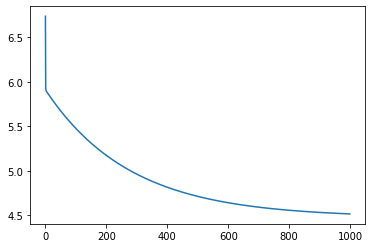

In [43]:
plt.plot(range(1000),J)

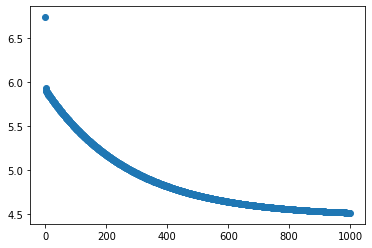

In [44]:
plt.scatter(range(1000),J)